In [1]:

#PyTorch implementation of Single Layer Perceptron to separate linearly separable data

#implementation of a single layer Perceptron with gradient descen 

#A single pattern of data is a 2-dimensional point in the cartesian plane with (-1, 1) labels.


In [2]:
import torch
import pandas as pd
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
inputDim = 2
losses = []
epochs = 10
eta = 0.01 #learning rate

In [4]:
# we can choose learning method

In [5]:
methods = ['backward', 'grad', 'optimizer']
method = methods[0]

In [6]:
# for read data used CSV for AND,OR,XOR etc

data = pd.read_csv('F:\8th sem\Soft Computing\single perceptron\data.csv') #taking OR The list of point is stored in data.csv file
labels = torch.tensor(data['target'].values, dtype=torch.float32)   #target values
data = torch.tensor(data[['x', 'y']].values, dtype=torch.float32)   #input values 

In [7]:
numpt = data.size(0)

weights = torch.zeros(inputDim, dtype=torch.float32, requires_grad=True) #initial value set zeros
bias = torch.zeros(1, requires_grad=True) #initial value set zeros

In [8]:
if method == 'optimizer':
    optimizer = optim.SGD((weights, bias),lr=eta) #that will hold the current state and will update the parameters based on the computed gradients.

In [11]:
for epoch in range(epochs):
    total_loss = 0

In [32]:
for idx in range(numpt):
        # take current input
        X = data[idx,:]
        y = labels[idx]
        

        # compute output and loss
        out = torch.add(torch.dot(X,weights), bias) #yin = xiwi+b
        loss = torch.max(torch.tensor(0, dtype=torch.float32), -1 * out * y) #Returns the maximum value of all elements in the input tensor
        total_loss += loss.item()
        
        if method == 'grad':
            gradw = torch.autograd.grad(loss, weights, retain_graph=True) 
            gradb = torch.autograd.grad(loss, bias, retain_graph=True)

            with torch.no_grad():#Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward().
                weights -= eta * gradw[0] #gradient descent x=x-learning rate*df(x)/dx 
                bias -= eta * gradb[0]
        
        
        elif method == 'backward':      
            # backpropagation
            loss.backward()
         
            # compute accuracy and update parameters
            with torch.no_grad():
                weights -= eta * weights.grad
                bias -= eta * bias.grad
                # reset gradient to zero
                weights.grad.zero_()
                bias.grad.zero_()
                
                
        elif method == 'optimizer': 
            loss.backward()
            optimizer.step() #All optimizers implement a step() method, that updates the parameters.
            optimizer.zero_grad()
            #.backward() mutiple times accumulates the gradient (by addition) for each parameter.call optimizer.zero_grad() after each .step() call


losses.append(total_loss / numpt)
#print(losses[-1])

In [33]:
# plot points, hyperplane and learning curve

In [34]:
#model 1 for implement


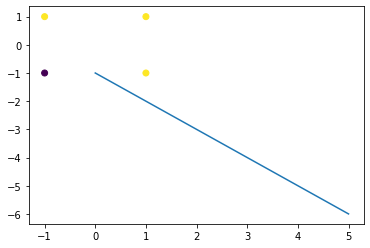

In [35]:
plt.figure()  
plt.scatter(data[:,0].numpy(), data[:,1].numpy(), c=labels.numpy()) 
xr = np.linspace(0, 5, 2)
yr = (-1 / weights[1].item()) * (weights[0].item() * xr  + bias.item())
plt.plot(xr, yr,'-')
plt.show()

In [36]:
# model 2 losses

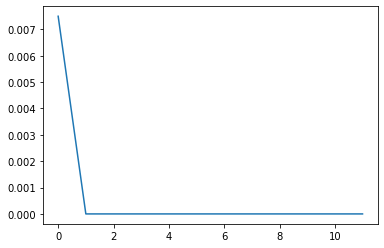

In [37]:
plt.figure()
plt.plot(losses, '-')
plt.show()